## Header
This Script will perform preproccessing on a dataset of images.

In [146]:
#import general packages
import numpy as np
import cv2
import matplotlib.pyplot as plt
import glob
import os
import random

Next step is to find the paths of all imgages of the dataset.

Number of NOK images: 1860
Number of OK images: 1896


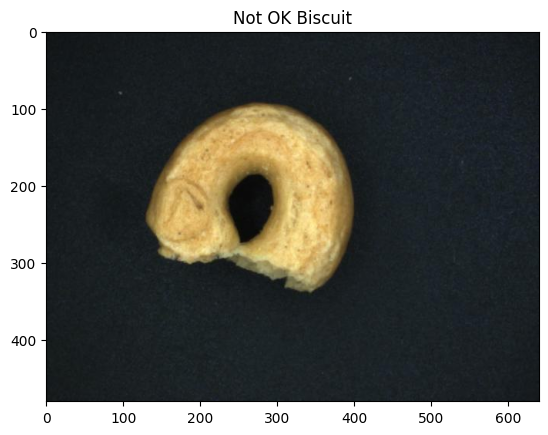

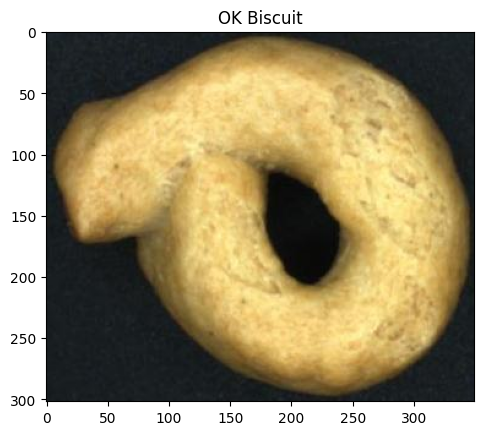

In [147]:
# define path of dataset
dir = r"C:\Users\marc\Documents\Biscuit Dataset - Team 4"

# create list of all image paths
NOK_image_paths = glob.glob(os.path.join(dir, "NOK", '*.jpg'),recursive=True)
OK_image_paths = glob.glob(os.path.join(dir, "OK", '*.jpg'),recursive=True)

# create list of all txt files which contain the bounding box coordinates
NOK_txt_paths = [NOK_image_paths[i].replace(".jpg",".txt") for i in range(len(NOK_image_paths))]
OK_txt_paths = [OK_image_paths[i].replace(".jpg",".txt") for i in range(len(OK_image_paths))]

# size of the dataset
print("Number of NOK images: {}".format(len(NOK_image_paths)))
print("Number of OK images: {}".format(len(OK_image_paths)))

# function to show an image
def show_image(image_path, title:str = ""):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(image)
    plt.title(title)
    plt.show()

# show an image from the NOK dataset
random_index = random.randint(0, len(NOK_image_paths))
image_path = NOK_image_paths[random_index]
show_image(image_path, title="Not OK Biscuit")

# show an image from the OK dataset
random_index = random.randint(0, len(OK_image_paths))
image_path = OK_image_paths[random_index]
show_image(image_path, title="OK Biscuit")


# Extract the bounding box coordinates from the txt files
In the next step, we will extract the bounding box coordinates from the txt files and apply the bounding box to the images.

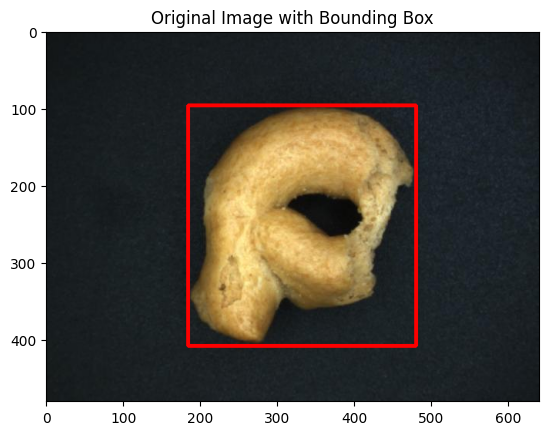

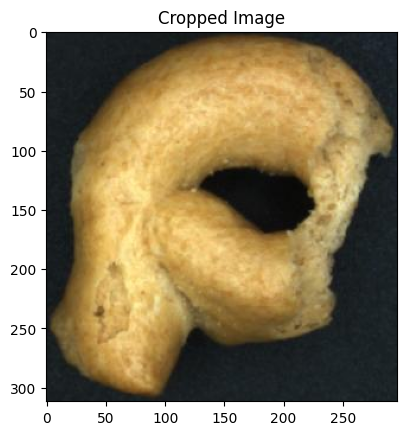

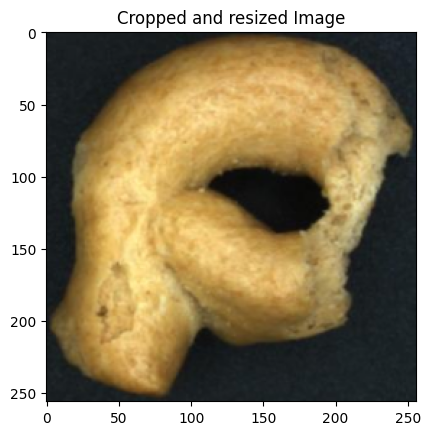

In [148]:
# create a list which contains all image paths
all_images_paths = NOK_image_paths + OK_image_paths
all_txt_paths = NOK_txt_paths + OK_txt_paths

cropped_and_resized_images = []

# iterate over all image paths and apply the bounding box to the images
for idx,image_path in enumerate(all_images_paths):
    # extract the bounding box coordinates
    txt_file_path = all_txt_paths[idx]
    # check if the txt file matches the image path
    if txt_file_path!= image_path.replace(".jpg", ".txt"):
        print("The txt file path does not match the image path!")
        break
    
    # get the bounding box coordinates
    with open(txt_file_path) as f:
        lines = f.readlines()
        coordinates = lines[1].split(",")[2:]
        x_min = int(float(coordinates[0].split(" ")[1]))
        y_min = int(float(coordinates[1].split(" ")[1]))
        x_max = int(float(coordinates[4].split(" ")[1]))
        y_max = int(float(coordinates[5].split(" ")[1]))
        
    ## apply the bounding box to the image
    # read the image
    image = cv2.imread(image_path)
    # convert to RGB
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    # crop the image
    cropped_image = image[y_min:y_max, x_min:x_max]
    # save the image
    cropped_and_resized_image_path = image_path.replace("Biscuit Dataset - Team 4", "Biscuit Dataset - Team 4 - Cropped")
    if not os.path.exists(os.path.dirname(cropped_and_resized_image_path)):
       os.makedirs(os.path.dirname(cropped_and_resized_image_path))
    # add cropped to the image name
    cropped_and_resized_image_path = cropped_and_resized_image_path.replace(".jpg", "_cropped_resized.jpg")
    # change color back to BGR
    cropped_image = cv2.cvtColor(cropped_image, cv2.COLOR_RGB2BGR)
    # resize the image to a standard size
    cropped_and_resized_image = cv2.resize(cropped_image, (256, 256))
    # save the image
    cv2.imwrite(cropped_and_resized_image_path, cropped_and_resized_image)
    
    # add the cropped and resized image to the list
    cropped_and_resized_images.append(cropped_and_resized_image_path)
    
    ## Only for visualisation purposes
    if idx == 0:
        image = cv2.rectangle(image, (x_min, y_min), (x_max, y_max), (255,0,0), 3)
        plt.imshow(image)
        plt.title("Original Image with Bounding Box")
        plt.show()
        
        # add visualisation of the cropped image
        cropped_image = cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB)
        plt.imshow(cropped_image)
        plt.title("Cropped Image")
        plt.show()
        
        # add visualisation of the cropped and resized image
        cropped_and_resized_image = cv2.cvtColor(cropped_and_resized_image, cv2.COLOR_BGR2RGB)
        plt.imshow(cropped_and_resized_image)
        plt.title("Cropped and resized Image")
        plt.show()
    

# Convert all images to grayscale
The next step is to convert all images to grayscale.

In [149]:
# function to convert all images to grayscale
def to_grayscale(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    return image

# create a list to save all grayscale image paths
all_images_grayscale = []

for image_path in cropped_and_resized_images:
    grayscale_image_path = image_path.replace("Biscuit Dataset - Team 4 - Cropped", "Biscuit Dataset - Team 4 - Cropped_Grayscale")
    if not os.path.exists(os.path.dirname(grayscale_image_path)):
        os.makedirs(os.path.dirname(grayscale_image_path))
    grayscale_image_path = grayscale_image_path.replace(".jpg", "_grayscale.jpg")
    image = to_grayscale(image_path)
    cv2.imwrite(grayscale_image_path, image)
    
    all_images_grayscale.append(grayscale_image_path)
    

Show the same image from the beginning for visualisation purposes

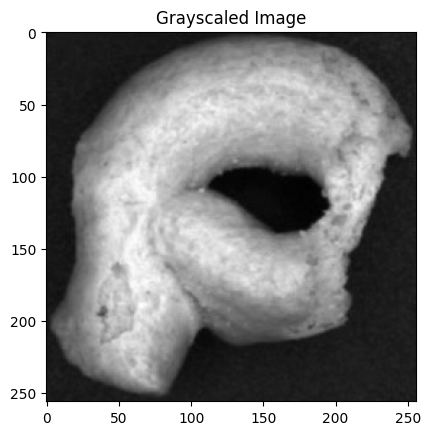

In [150]:
# Show the same image from the beginning for visualisation purposes
image_path = all_images_grayscale[0]
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
plt.imshow(image,cmap='gray')
plt.title("Grayscaled Image")
plt.show()

# Threshold and filtering the images
The next step is to threshold and filter the images.

In [154]:
# function to perform thresholding and 2D-Filter on an image
def threshold_and_filter(image_path, threshold_value, kernel):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    thresholded = np.where(image < threshold_value, 0, image)
    # perform 2D-Filter
    filtered_image = cv2.filter2D(thresholded, -1, kernel)

    # set background to black
    background_black = np.where(thresholded == 0, 0, filtered_image)
    
    return background_black

# threshold_value for thresholding
threshold_value = 50
# Kernel for 2D-Filter
kernel = np.array([
    [1,  2,  1],
    [2,  4,  2],
    [1,  2,  1]
], dtype=np.float32)
kernel = kernel / np.sum(kernel)  #normalize kernel

# list for all thresholded images
all_images_threshold = []

# perform thresholding and 2D-Filter on all images
for image_path in all_images_grayscale:
    grayscale_threshold_image_path = image_path.replace("Biscuit Dataset - Team 4 - Cropped_Grayscale", "Biscuit Dataset - Team 4 - Cropped_Grayscale_Threshold")
    if not os.path.exists(os.path.dirname(grayscale_threshold_image_path)):
        os.makedirs(os.path.dirname(grayscale_threshold_image_path))
    grayscale_threshold_image_path = grayscale_threshold_image_path.replace(".jpg", "_threshold.jpg")
    image = threshold_and_filter(image_path,threshold_value=threshold_value,kernel=kernel)
    cv2.imwrite(grayscale_threshold_image_path, image)
    
    all_images_threshold.append(grayscale_threshold_image_path)

Show the same image from the beginning for visualisation purposes

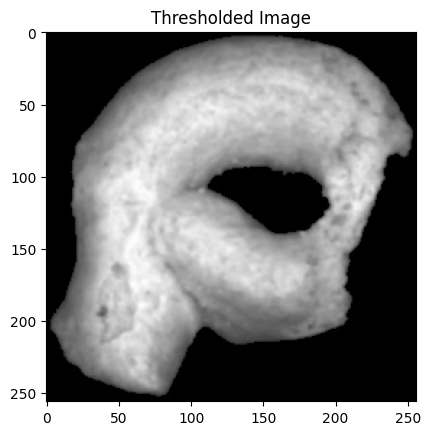

In [155]:
# Show the same image from the beginning for visualisation purposes
image_path = all_images_threshold[0]
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
plt.imshow(image,cmap='gray')
plt.title("Thresholded Image")
plt.show()

# Normalize the images

Calculate the histogram of the images and normalize them.

In [156]:
# define to normalize the images
def normalize_image(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    hist, bins = np.histogram(image.flatten(), 256, [0,256])
    cdf = hist.cumsum()
    cdf_normalized = cdf * hist.max() / cdf.max()
    cdf_m = np.ma.masked_equal(cdf,0)
    cdf_m = (cdf_m - cdf_m.min())*255/(cdf_m.max()-cdf_m.min())
    cdf = np.ma.filled(cdf_m,0).astype('uint8')
    image_normalized = cdf[image]
    return image_normalized
    
all_normalized_images = []

# normalize the images from 0 to 1
for image_path in all_images_threshold:
    normalized_image_path = image_path.replace("Biscuit Dataset - Team 4 - Cropped_Grayscale_Threshold", "Biscuit Dataset - Team 4 - Final_Normalized")
    if not os.path.exists(os.path.dirname(normalized_image_path)):
        os.makedirs(os.path.dirname(normalized_image_path))
    normalized_image_path = normalized_image_path.replace(".jpg", "_normalized.jpg")
    image = normalize_image(image_path)
    cv2.imwrite(normalized_image_path, image)
    
    all_normalized_images.append(normalized_image_path)


# Show the image from the beginning and the end side to side to see the difference

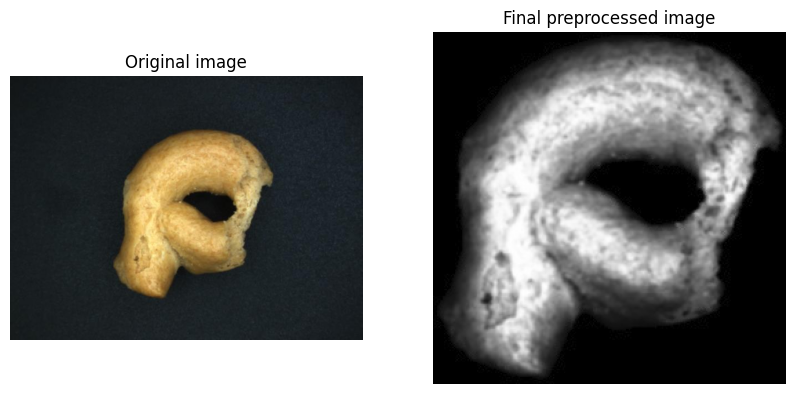

In [157]:
# Create a figure with two subplots side by side
plt.figure(figsize=(10, 5))  # Adjust the figure size

# First subplot for the original image
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first image
image_path = all_images_paths[0]
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB for plt
plt.imshow(image)
plt.title("Original image")
plt.axis('off')  # Hide axes

# Second subplot for the thresholded image
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second image
image_path = all_normalized_images[0]
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
image = cv2.cvtColor(image, cv2.COLOR_GRAY2RGB)  # Convert to RGB for plt
plt.imshow(image)
plt.title("Final preprocessed image")
plt.axis('off')  # Hide axes

# Show the figure
plt.show()

# Optional: Find the contour of the biscuit using contour detection instead of extracting the bounding box from the txt files.

Next we want to detect the biscuit. For this we will use the contour method.

In [ ]:
# perform contour detection on all images
def detect_roi(image_path):
    # read image
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    
    # find contours
    contours, _ = cv2.findContours(image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # take the largest contour
    cnt = max(contours, key=cv2.contourArea)

    # caluclate the bounding rectangle
    x, y, w, h = cv2.boundingRect(cnt)

    # crop the image 
    image = image[y:y+h, x:x+w]

    return image

# list for all cropped images
all_images_grayscale_thresholded_cropped = []

# perform thresholding and 2D-Filter on all images
for image_path in all_images_threshold:
    grayscale_threshold_cropped_image_path = image_path.replace("Biscuit Dataset - Team 4 - Threshold", "Biscuit Dataset - Team 4 - Cropped")
    if not os.path.exists(os.path.dirname(grayscale_threshold_cropped_image_path)):
        os.makedirs(os.path.dirname(grayscale_threshold_cropped_image_path))
    grayscale_threshold_cropped_image_path = grayscale_threshold_cropped_image_path.replace(".jpg", "_threshold.jpg")
    image = detect_roi(image_path)
    cv2.imwrite(grayscale_threshold_cropped_image_path, image)
    
    all_images_grayscale_thresholded_cropped.append(grayscale_threshold_cropped_image_path)
    
plt.imshow(image,cmap='gray')
plt.title("Cropped image")
plt.show()